<a href="https://colab.research.google.com/github/jtkernan7/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/5_Cluster_with_and_w_out_PCA_JT_Kernan_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

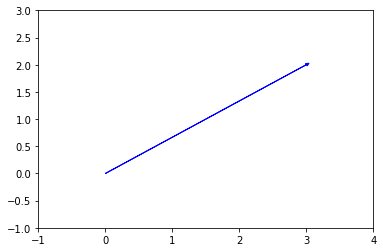

In [0]:
blue = np.array([3,2])

plt.arrow(0,0, blue[0], blue[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,4)          
plt.ylim(-1,3)

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b = [2 , -15, 6, 20]

In [0]:
b2 = np.linalg.norm(b)
b2

25.787593916455254

In [0]:
#length of the vector

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = np.array([3, 7, -1, 12])
d = np.array([9, 7, 4, 6])
cdotd = np.dot(c,d)
cdotd

144

In [0]:
#they are not. if they were the dot product would  be 0

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

In [0]:
eInverse = np.linalg.inv(e)
eInverse

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [0]:
eT = e.T
eT

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:

print(np.mean(df['customers']))
print(np.var(df['customers']))
print(np.std(df['customers']))

1135.7142857142858
84653.06122448981
290.95199127087926


In [0]:

print(np.mean(df['snow']))
print(np.var(df['snow']))
print(np.std(df['snow']))

2.7142857142857144
7.346938775510203
2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#no because one has very high values and one has very low values. they are scaled so differrently, that comparing vaiances has no benifit 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
covar = np.cov(df['customers'], df['snow'], ddof=0)
print(covar)

[[8.46530612e+04 5.74489796e+02]
 [5.74489796e+02 7.34693878e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [3]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
##### Your Code Here #####
country = df.Country

In [0]:
df = df.drop('Country', axis =1)

In [0]:
x = df.copy()
x.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
for i in x:
  x[i] = x[i] - np.mean(x[i])
  x[i] = x[i] / np.std(x[i])
x.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####
a = x.values
a

In [0]:
cov_matrix = np.matmul(np.transpose(a),a)
cov_matrix

In [0]:
values, vectors = np.linalg.eig(cov_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)

In [0]:
P = vectors.T.dot(x.T)
print("\n Projected Data: \n", P.T)


 Projected Data: 
 [[-9.54489838e-01+0.00000000e+00j  3.28318325e-01+0.00000000e+00j
   1.82982906e+00+0.00000000e+00j  1.82690082e-16+0.00000000e+00j
  -4.74796946e-16+0.00000000e+00j -3.13122883e-16+0.00000000e+00j
  -6.87126194e-16-1.95237449e-16j -6.87126194e-16+1.95237449e-16j
   6.23906904e-17+0.00000000e+00j -4.54902159e-16+2.02084784e-16j
  -4.54902159e-16-2.02084784e-16j -2.03849335e-16+0.00000000e+00j
  -1.31328129e-16-7.72990971e-17j -1.31328129e-16+7.72990971e-17j
   1.90416877e-16+0.00000000e+00j  3.31331633e-16+0.00000000e+00j
  -5.11375448e-16+0.00000000e+00j]
 [-4.52095094e+00+0.00000000e+00j -1.73537967e+00+0.00000000e+00j
  -7.81411952e-01+0.00000000e+00j -3.07385425e-16+0.00000000e+00j
   4.84207022e-17+0.00000000e+00j  2.11553235e-15+0.00000000e+00j
  -8.52254067e-16-1.16526428e-16j -8.52254067e-16+1.16526428e-16j
   4.20488466e-17+0.00000000e+00j -5.90443171e-16-5.94803677e-16j
  -5.90443171e-16+5.94803677e-16j  9.46777155e-17+0.00000000e+00j
   8.66296341e-17+1.5

In [0]:
eigvec = P[:2]

In [0]:
eigdf = pd.DataFrame(eigvec.T, columns = ['PC1','PC2'])

In [0]:
x_points = eigdf['PC1']
y_points = eigdf['PC2']

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


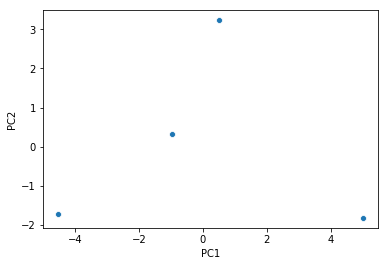

In [0]:

sns.scatterplot(x_points, y_points);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [4]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [5]:
points.shape

(200, 2)

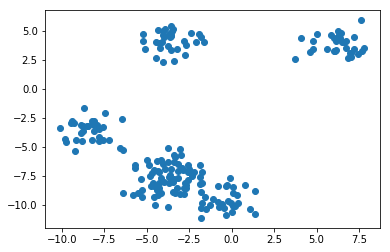

In [47]:
plt.scatter(points.x, points.y)
plt.show()

In [0]:
threeK = points.copy()
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
kmeans.fit(threeK)
labels = kmeans.labels_
new_series = pd.Series(labels)
threeK['clusters'] = new_series.values

# print(labels)

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids
  

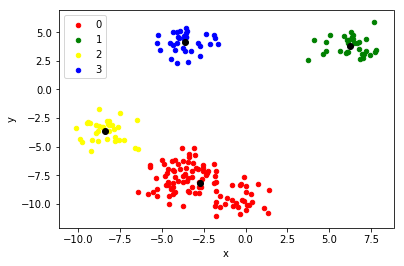

In [62]:
centroids = get_centroids(threeK, 'clusters')
plot_clusters(threeK, 'clusters', centroids)

#five points below
#started with 4 but 5 seems better

In [0]:
threeK = points.copy()

In [55]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5)
kmeans.fit(threeK)
labels = kmeans.labels_

print(labels)

[3 4 0 3 0 4 3 3 1 4 4 4 0 4 3 0 3 4 4 2 3 2 2 2 4 4 0 1 4 4 4 4 0 2 4 4 4
 4 1 0 0 2 1 1 1 4 4 4 3 0 2 3 3 1 2 0 4 1 1 3 2 0 3 1 2 1 2 1 3 1 4 4 4 4
 2 2 4 4 1 2 1 4 4 4 1 4 1 4 4 2 1 4 2 4 0 4 4 4 4 0 4 4 3 4 4 2 3 3 3 2 0
 2 4 3 0 4 1 1 2 1 2 0 4 3 4 3 4 2 1 3 0 3 4 3 1 1 0 2 3 4 1 4 4 2 0 1 4 1
 3 4 4 0 3 2 4 1 0 2 4 3 0 4 1 3 2 2 0 1 0 0 3 0 1 2 0 4 4 4 4 3 4 0 4 4 0
 4 3 2 1 0 4 3 2 3 4 1 2 2 0 0]


In [56]:
new_series = pd.Series(labels)
threeK['clusters'] = new_series.values

threeK.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue', 4:'orange'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[4].x, centroids.iloc[4].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids
  

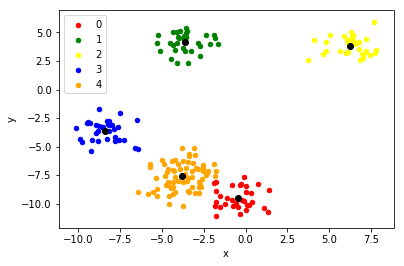

In [58]:
centroids = get_centroids(threeK, 'clusters')
plot_clusters(threeK, 'clusters', centroids)

#MVP above
#Points w/ PCA below

In [0]:
x = points.copy()

In [0]:
a = points.values
cov_matrix = np.matmul(np.transpose(a),a)
values, vectors = np.linalg.eig(cov_matrix)
P = vectors.T.dot(x.T)
eigvec = P[:2]
eigdf = pd.DataFrame(eigvec.T, columns = ['x','y'])

In [0]:
x_points = eigdf['x']
y_points = eigdf['y']

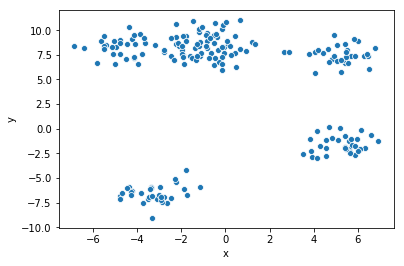

In [41]:
import seaborn as sns
sns.scatterplot(x_points, y_points);

In [0]:
threeK = eigdf.copy()

In [0]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5)
kmeans.fit(threeK)
labels = kmeans.labels_

print(labels)

In [0]:
new_series = pd.Series(labels)
threeK['clusters'] = new_series.values

threeK.head()

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue', 4:'orange'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[4].x, centroids.iloc[4].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids
  

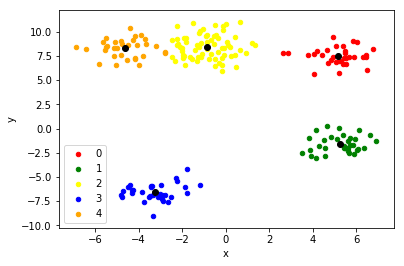

In [46]:
centroids = get_centroids(threeK, 'clusters')
plot_clusters(threeK, 'clusters', centroids)